In [3]:
import chess.pgn
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd
from IPython.core.display import HTML
from bs4 import BeautifulSoup
import re
import io
from io import StringIO
import ast

In [76]:
import chess.pgn
import pandas as pd
import re

# Percorso del file PGN (modifica con il tuo file)
file_path = "lichess_andrea_spagnolo_2024-12-10.pgn"

# Lista per memorizzare i dati delle partite
games_data = []

# Funzione per estrarre tempi dal PGN
def extract_times(game):
    times = []
    for node in game.mainline():
        comment = node.comment
        # Estrarre il tempo dalla stringa del commento (%clk)
        time_match = re.search(r"%clk\s(\d+:\d+:\d+)", comment)
        times.append(time_match.group(1) if time_match else None)
    return times

# Funzione per estrarre le mosse PGN
def extract_pgn_moves(game):
    moves = []
    for node in game.mainline():
        moves.append(node.san())  # Usa SAN (Standard Algebraic Notation)
    return moves

# Leggere il file PGN
with open(file_path, "r") as pgn_file:
    while True:
        # Legge una partita alla volta
        game = chess.pgn.read_game(pgn_file)
        if game is None:
            break

        # Estrae i dati dei tag
        times = extract_times(game)
        moves_pgn = extract_pgn_moves(game)  # Estrai le mosse in formato PGN

        game_data = {
            "Date": game.headers.get("Date", ""),
            "White": game.headers.get("White", ""),
            "Black": game.headers.get("Black", ""),
            "Result": game.headers.get("Result", ""),
            "WhiteElo": game.headers.get("WhiteElo", ""),
            "BlackElo": game.headers.get("BlackElo", ""),
            "Opening": game.headers.get("Opening", ""),
            "Termination": game.headers.get("Termination", ""),
            "Moves_uci_format": " ".join([str(move) for move in game.mainline_moves()]),
            "Moves_pgn_format": " ".join(moves_pgn),  # Combina le mosse PGN in una stringa
            "MoveTimes": times
        }
        games_data.append(game_data)

# Creare il DataFrame
data = pd.DataFrame(games_data)

# Salvare il DataFrame in un file CSV (opzionale)
data.to_csv("partite_andrea_spagnolo_final.csv", index=False)

# Visualizzare il DataFrame
data.head()

,Date,White,Black,Result,WhiteElo,BlackElo,Opening,Termination,Moves_uci_format,Moves_pgn_format,MoveTimes
0,2024.11.21,andrea_spagnolo,shamsir,1/2-1/2,1595,1606,English Opening,Time forfeit,c2c4 d7d6 b1c3 g7g6 g2g3 f8g7 f1g2 c7c6 e2e3 g...,c4 d6 Nc3 g6 g3 Bg7 Bg2 c6 e3 Nf6 d4 Qb6 b3 Nb...,"[0:10:00, 0:10:00, 0:09:58, 0:09:59, 0:09:58, ..."
1,2024.11.21,tigerpathan,andrea_spagnolo,0-1,1500,1589,Queen's Pawn Game: Krause Variation,Normal,d2d4 d7d5 g1f3 c7c5 c1f4 c8f5 b1c3 e7e6 d4c5 f...,d4 d5 Nf3 c5 Bf4 Bf5 Nc3 e6 dxc5 Bxc5 Qd2 Nf6 ...,"[0:10:00, 0:10:00, 0:09:56, 0:09:58, 0:09:42, ..."
2,2024.11.20,andrea_spagnolo,jay319,0-1,1601,1609,"English Opening: King's English Variation, Two...",Normal,c2c4 g8f6 b1c3 e7e5 g2g3 f8b4 f1g2 c7c6 g1f3 d...,c4 Nf6 Nc3 e5 g3 Bb4 Bg2 c6 Nf3 d6 d3 e4 dxe4 ...,"[0:10:00, 0:10:00, 0:09:59, 0:09:58, 0:09:58, ..."
3,2024.11.20,kartoffel-fee,andrea_spagnolo,1-0,1540,1628,Hungarian Opening,Normal,g2g3 d7d5 f1g2 g8f6 d2d4 c8f5 c2c3 e7e6 c1g5 f...,g3 d5 Bg2 Nf6 d4 Bf5 c3 e6 Bg5 Be7 Nd2 h6 Bxf6...,"[0:10:00, 0:10:00, 0:09:59, 0:09:57, 0:09:57, ..."
4,2024.11.18,MysterDhanvin10,andrea_spagnolo,1-0,1604,1642,Slav Defense,Normal,d2d4 d7d5 c2c4 c7c6 b1c3 g8f6 c1f4 c8f5 f4b8 a...,d4 d5 c4 c6 Nc3 Nf6 Bf4 Bf5 Bxb8 Rxb8 cxd5 cxd...,"[0:10:00, 0:10:00, 0:09:59, 0:09:55, 0:09:57, ..."


In [3]:
# Conta il numero di occorrenze dei risultati
res = data['Result'].value_counts()

# Calcola il totale delle partite
total_games = res.sum()

# Crea una mappatura per rendere i risultati più leggibili
result_mapping = {
    "1-0": "Win",
    "0-1": "Lose",
    "1/2-1/2": "Draw"
}

# Crea una struttura HTML per la tabella
html = "<html><body>"
html += "<h2>Match results</h2><table border='1'>"
html += "<tr><th>Result</th><th>Occorences</th><th>percentage (%)</th></tr>"

# Aggiungi le righe della tabella con i dati
for risultato, occorrenza in res.items():
    # Usa la mappatura per ottenere il valore descrittivo
    esito_descrittivo = result_mapping.get(risultato, risultato)
    percentuale = (occorrenza / total_games) * 100  # Calcolo percentuale
    html += f"<tr><td>{esito_descrittivo}</td><td>{occorrenza}</td><td>{percentuale:.2f}%</td></tr>"

html += "</table></body></html>"

# Usa BeautifulSoup per generare il codice HTML
soup = BeautifulSoup(html, 'html.parser')

# Aggiungi CSS per giustificare il testo delle celle
for th in soup.find_all('th'):
    th['style'] = 'text-align: center;'

for i, td in enumerate(soup.find_all('td')):
    if i % 3 == 0:  # Colonna "Esito della Partita" (indice multiplo di 3)
        td['style'] = 'text-align: center;'
    elif i % 3 == 1:  # Colonna "Numero di Partite" (indice modulo 3 = 1)
        td['style'] = 'text-align: center;'
    else:  # Colonna "Percentuale (%)" (indice modulo 3 = 2)
        td['style'] = 'text-align: center;'

# Stampa il codice HTML generato
display(HTML(str(soup.prettify())))

Result,Occorences,percentage (%)
Win,476,49.74%
Lose,447,46.71%
Draw,34,3.55%


Opening,Occorrences
Queen's Pawn Game: Accelerated London System,147
Vienna Game: Vienna Gambit,33
Horwitz Defense,21
Indian Defense,20
Vienna Game,15
Queen's Pawn Game,15
Queen's Pawn Game: London System,8
Sicilian Defense: Smith-Morra Gambit Accepted,8
"Queen's Pawn Game: London System, with e6",8
English Opening: King's English Variation,8


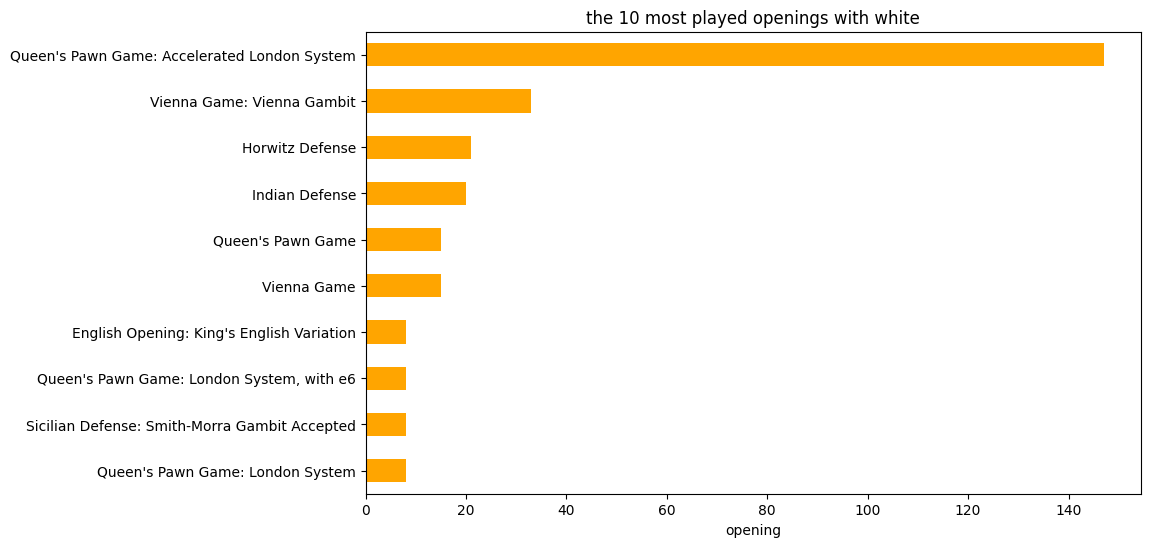

In [26]:
#MOSTRO APERTURE PIU' USATE

white_data = data[data['White']=="andrea_spagnolo"]

# Conta le occorrenze dei valori nella colonna 'openings' e prendi i primi 10
top_10_openings = white_data['Opening'].value_counts().head(10)

# Crea una struttura HTML per la tabella
html = "<html><body>"
html += "<h2>the 10 most played openings with white</h2><table border='1'>"
html += "<tr><th>Opening</th><th>Occorrences</th></tr>"

# Aggiungi le righe della tabella con i dati
for apertura, occorrenza in top_10_openings.items():
    html += f"<tr><td>{apertura}</td><td>{occorrenza}</td></tr>"

html += "</table></body></html>"

# Usa BeautifulSoup per generare il codice HTML
soup = BeautifulSoup(html, 'html.parser')

# Aggiungi CSS per giustificare a sinistra il testo delle celle
for th in soup.find_all('th'):
    th['style'] = 'text-align: center;'

for i, td in enumerate(soup.find_all('td')):
    if i % 2 == 0:  # Colonna "Apertura" (indice pari)
        td['style'] = 'text-align: left;'
    else:  # Colonna "Occorrenze" (indice dispari)
        td['style'] = 'text-align: center;'

# Stampa il codice HTML generato
display(HTML(str(soup.prettify)))


# Ordina in ordine decrescente
top_10_openings = top_10_openings.sort_values(ascending=False)

# Crea un grafico orizzontale
plt.figure(figsize=(10, 6))
top_10_openings.sort_values(ascending=True).plot(kind='barh', color='orange')  # Ordinamento decrescente per le barre orizzontali

# Aggiungi etichetta per l'asse y e il titolo, ma nascondi l'asse x
plt.xlabel('opening')
plt.title('the 10 most played openings with white')
plt.ylabel('')  # Nasconde l'etichetta dell'asse x

# Mostra il grafico
plt.show()

Opening,Occorrences
Petrov's Defense: Stafford Gambit,68
Bishop's Opening: Boi Variation,28
Four Knights Game: Italian Variation,17
Van't Kruijs Opening,14
Queen's Pawn Game: Accelerated London System,13
Petrov's Defense,12
Englund Gambit: Main Line,11
Englund Gambit,11
"Italian Game: Giuoco Pianissimo, Italian Four Knights Variation",10
Englund Gambit Declined,8


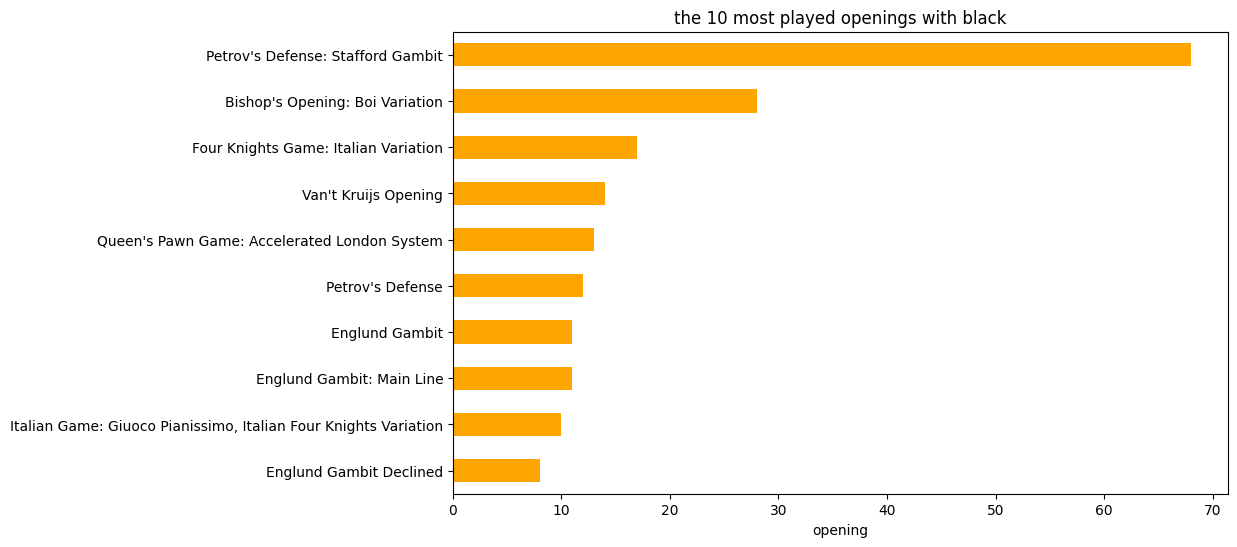

In [28]:
#MOSTRO APERTURE PIU' USATE

black_data = data[data['Black']=="andrea_spagnolo"]

# Conta le occorrenze dei valori nella colonna 'openings' e prendi i primi 10
top_10_openings = black_data['Opening'].value_counts().head(10)

# Crea una struttura HTML per la tabella
html = "<html><body>"
html += "<h2>the 10 most played openings with black</h2><table border='1'>"
html += "<tr><th>Opening</th><th>Occorrences</th></tr>"

# Aggiungi le righe della tabella con i dati
for apertura, occorrenza in top_10_openings.items():
    html += f"<tr><td>{apertura}</td><td>{occorrenza}</td></tr>"

html += "</table></body></html>"

# Usa BeautifulSoup per generare il codice HTML
soup = BeautifulSoup(html, 'html.parser')

# Aggiungi CSS per giustificare a sinistra il testo delle celle
for th in soup.find_all('th'):
    th['style'] = 'text-align: center;'

for i, td in enumerate(soup.find_all('td')):
    if i % 2 == 0:  # Colonna "Apertura" (indice pari)
        td['style'] = 'text-align: left;'
    else:  # Colonna "Occorrenze" (indice dispari)
        td['style'] = 'text-align: center;'

# Stampa il codice HTML generato
display(HTML(str(soup.prettify)))


# Ordina in ordine decrescente
top_10_openings = top_10_openings.sort_values(ascending=False)

# Crea un grafico orizzontale
plt.figure(figsize=(10, 6))
top_10_openings.sort_values(ascending=True).plot(kind='barh', color='orange')  # Ordinamento decrescente per le barre orizzontali

# Aggiungi etichetta per l'asse y e il titolo, ma nascondi l'asse x
plt.xlabel('opening')
plt.title('the 10 most played openings with black')
plt.ylabel('')  # Nasconde l'etichetta dell'asse x

# Mostra il grafico
plt.show()

In [30]:
white_data = data[data['White']=="andrea_spagnolo"]

top_10_openings = white_data['Opening'].value_counts().head(10).index

# Filtra i dati per le 10 aperture più usate
filtered_data = white_data[white_data['Opening'].isin(top_10_openings)]

# Crea una tabella pivot per contare vittorie, sconfitte e patte per ciascuna apertura
pivot = pd.pivot_table(filtered_data, index='Opening', columns='Result', aggfunc='size', fill_value=0)

# Aggiunge una colonna con il totale delle partite per ogni apertura
pivot['Total'] = pivot.sum(axis=1)

# Calcola le percentuali di vittorie, sconfitte e patte
for result in ['1-0', '0-1', '1/2-1/2']:
    if result in pivot.columns:
        pivot[f'{result}_percent'] = (pivot[result] / pivot['Total']) * 100

# Ordina la tabella per numero totale di partite in ordine decrescente
pivot = pivot.sort_values(by='Total', ascending=False)

# Crea una struttura HTML per la tabella
html = "<html><body><table border='1'>"
html += "<h2>the 10 most played openings with white</h2><table border='1'>"
html += "<tr><th>Apertura</th><th>Vittorie</th><th>Sconfitte</th><th>Patte</th><th>Vittorie (%)</th><th>Sconfitte (%)</th><th>Patte (%)</th></tr>"

# Itera attraverso le righe della tabella pivot per generare le righe della tabella HTML
for apertura, row in pivot.iterrows():
    vittorie = int(row.get('1-0', 0))  # Assicura che sia un intero
    sconfitte = int(row.get('0-1', 0))  # Assicura che sia un intero
    patte = int(row.get('1/2-1/2', 0))  # Assicura che sia un intero
    vittorie_percent = row.get('1-0_percent', 0)
    sconfitte_percent = row.get('0-1_percent', 0)
    patte_percent = row.get('1/2-1/2_percent', 0)

    html += (f"<tr><td>{apertura}</td>"
             f"<td>{vittorie}</td><td>{sconfitte}</td><td>{patte}</td>"
             f"<td>{vittorie_percent:.2f}%</td><td>{sconfitte_percent:.2f}%</td><td>{patte_percent:.2f}%</td></tr>")

html += "</table></body></html>"

# Usa BeautifulSoup per generare il codice HTML
soup = BeautifulSoup(html, 'html.parser')

# Stile per il centro dei titoli
for th in soup.find_all('th'):
    th['style'] = 'text-align: center;'

# Stile per il centro delle celle
for td in soup.find_all('td'):
    td['style'] = 'text-align: center;'

# Stampa il codice HTML generato
display(HTML(str(soup.prettify())))

Apertura,Vittorie,Sconfitte,Patte,Vittorie (%),Sconfitte (%),Patte (%)
Queen's Pawn Game: Accelerated London System,69,70,8,46.94%,47.62%,5.44%
Vienna Game: Vienna Gambit,18,12,3,54.55%,36.36%,9.09%
Horwitz Defense,11,8,2,52.38%,38.10%,9.52%
Indian Defense,7,12,1,35.00%,60.00%,5.00%
Queen's Pawn Game,9,6,0,60.00%,40.00%,0.00%
Vienna Game,7,6,2,46.67%,40.00%,13.33%
English Opening: King's English Variation,2,3,3,25.00%,37.50%,37.50%
Queen's Pawn Game: London System,4,4,0,50.00%,50.00%,0.00%
"Queen's Pawn Game: London System, with e6",6,2,0,75.00%,25.00%,0.00%
Sicilian Defense: Smith-Morra Gambit Accepted,5,3,0,62.50%,37.50%,0.00%


In [29]:
black_data = data[data['Black']=="andrea_spagnolo"]

top_10_openings = black_data['Opening'].value_counts().head(10).index

# Filtra i dati per le 10 aperture più usate
filtered_data = black_data[black_data['Opening'].isin(top_10_openings)]

# Crea una tabella pivot per contare vittorie, sconfitte e patte per ciascuna apertura
pivot = pd.pivot_table(filtered_data, index='Opening', columns='Result', aggfunc='size', fill_value=0)

# Aggiunge una colonna con il totale delle partite per ogni apertura
pivot['Total'] = pivot.sum(axis=1)

# Calcola le percentuali di vittorie, sconfitte e patte
for result in ['1-0', '0-1', '1/2-1/2']:
    if result in pivot.columns:
        pivot[f'{result}_percent'] = (pivot[result] / pivot['Total']) * 100

# Ordina la tabella per numero totale di partite in ordine decrescente
pivot = pivot.sort_values(by='Total', ascending=False)

# Crea una struttura HTML per la tabella
html = "<html><body>"
html += "<h2>the 10 most played openings with black</h2><table border='1'>"
html += "<tr><th>Apertura</th><th>Vittorie</th><th>Sconfitte</th><th>Patte</th><th>Vittorie (%)</th><th>Sconfitte (%)</th><th>Patte (%)</th></tr>"

# Itera attraverso le righe della tabella pivot per generare le righe della tabella HTML
for apertura, row in pivot.iterrows():
    vittorie = int(row.get('1-0', 0))  # Assicura che sia un intero
    sconfitte = int(row.get('0-1', 0))  # Assicura che sia un intero
    patte = int(row.get('1/2-1/2', 0))  # Assicura che sia un intero
    vittorie_percent = row.get('1-0_percent', 0)
    sconfitte_percent = row.get('0-1_percent', 0)
    patte_percent = row.get('1/2-1/2_percent', 0)

    html += (f"<tr><td>{apertura}</td>"
             f"<td>{vittorie}</td><td>{sconfitte}</td><td>{patte}</td>"
             f"<td>{vittorie_percent:.2f}%</td><td>{sconfitte_percent:.2f}%</td><td>{patte_percent:.2f}%</td></tr>")

html += "</table></body></html>"

# Usa BeautifulSoup per generare il codice HTML
soup = BeautifulSoup(html, 'html.parser')

# Stile per il centro dei titoli
for th in soup.find_all('th'):
    th['style'] = 'text-align: center;'

# Stile per il centro delle celle
for td in soup.find_all('td'):
    td['style'] = 'text-align: center;'

# Stampa il codice HTML generato
display(HTML(str(soup.prettify())))

Apertura,Vittorie,Sconfitte,Patte,Vittorie (%),Sconfitte (%),Patte (%)
Petrov's Defense: Stafford Gambit,23,43,2,33.82%,63.24%,2.94%
Bishop's Opening: Boi Variation,14,14,0,50.00%,50.00%,0.00%
Four Knights Game: Italian Variation,8,9,0,47.06%,52.94%,0.00%
Van't Kruijs Opening,10,4,0,71.43%,28.57%,0.00%
Queen's Pawn Game: Accelerated London System,8,3,2,61.54%,23.08%,15.38%
Petrov's Defense,4,8,0,33.33%,66.67%,0.00%
Englund Gambit,3,8,0,27.27%,72.73%,0.00%
Englund Gambit: Main Line,2,9,0,18.18%,81.82%,0.00%
"Italian Game: Giuoco Pianissimo, Italian Four Knights Variation",3,7,0,30.00%,70.00%,0.00%
Englund Gambit Declined,2,6,0,25.00%,75.00%,0.00%


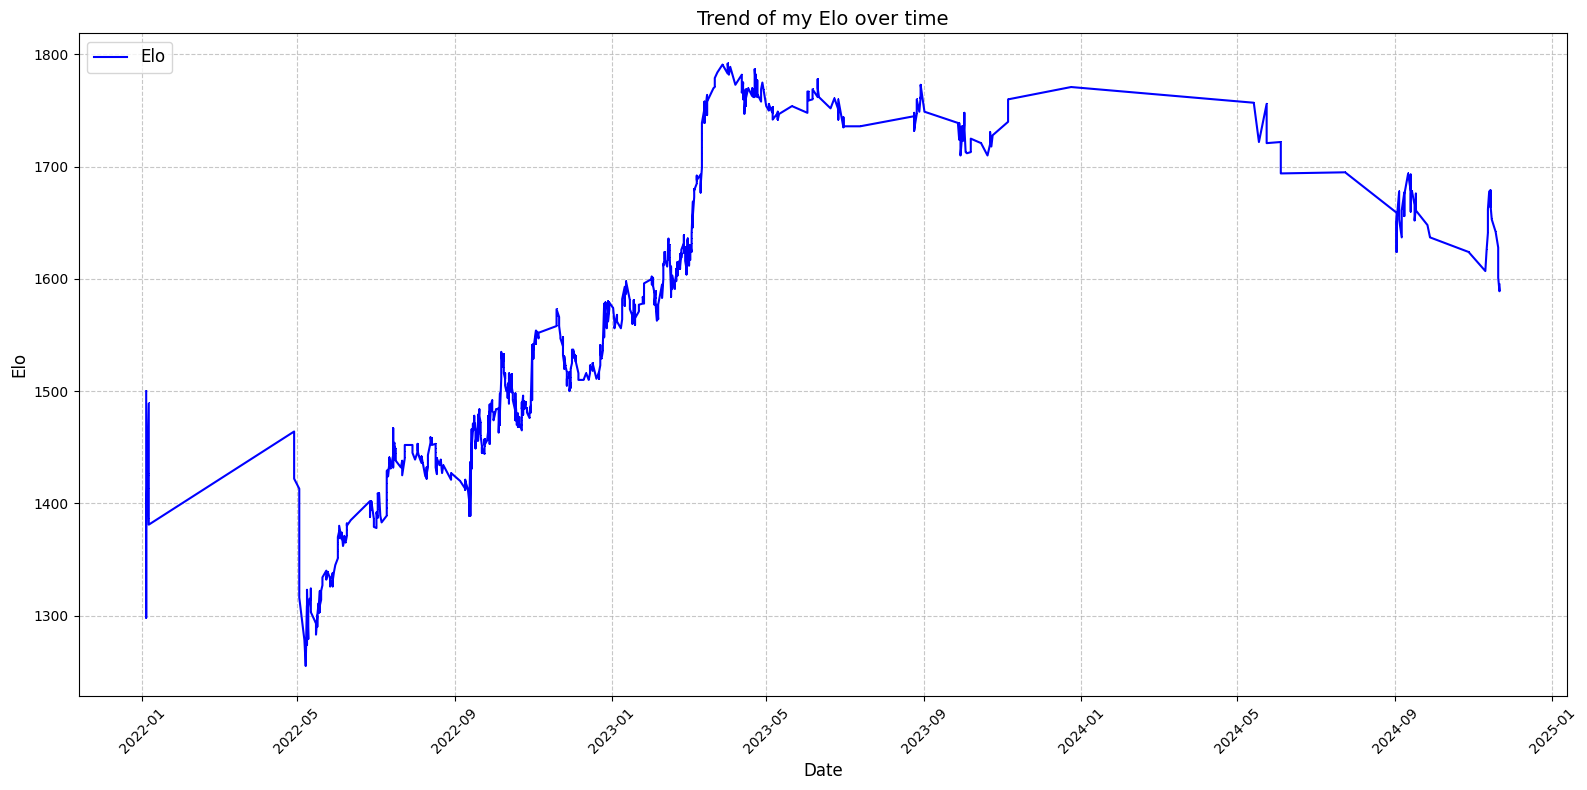

In [199]:
import pandas as pd
import matplotlib.pyplot as plt

# Assumo che 'data' sia il tuo dataframe Pandas
# Conversione della colonna Date in formato datetime
data['Date'] = pd.to_datetime(data['Date'], format='%Y.%m.%d')

# Aggiungo una colonna per il tuo Elo in base al colore dei pezzi
data['MyElo'] = data.apply(lambda x: x['WhiteElo'] if x['White'] == 'andrea_spagnolo' else x['BlackElo'], axis=1)

# Ordinamento per data
data = data.sort_values(by='Date')

plt.figure(figsize=(16, 8))  # Aumenta la larghezza per un grafico a piena pagina
plt.plot(data['Date'], data['MyElo'], marker=',', label='Elo', color='blue')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Elo', fontsize=12)
plt.title('Trend of my Elo over time', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(loc='upper left', fontsize=12)  # Posiziona la legenda in alto a sinistra
plt.xticks(rotation=45)
plt.tight_layout()  # Rimuove i margini

# Mostra il grafico
plt.show()

In [36]:
# Carica il motore scacchistico
engine_path = "/usr/local/bin/stockfish"  # Modifica con il percorso corretto del motore
engine = chess.engine.SimpleEngine.popen_uci(engine_path)

# Funzione per calcolare i punteggi delle mosse
def calculate_scores(moves):
    board = chess.Board()  # Crea una scacchiera iniziale
    scores = []
    
    for move in moves.split():
        try:
            board.push_san(move)  # Esegui la mossa sulla scacchiera
            score = engine.analyse(board, chess.engine.Limit(time=0.1))['Score']
            scores.append(score.white().score(mate_score=10000))  # Salva il punteggio (favorendo il Bianco)
        except Exception:
            scores.append(None)  # Se c'è un errore, salva None
    
    return scores

# Lista per accumulare i risultati
scores_list = []

# Aggiungi un contatore per monitorare il progresso
total_games = len(data)
print(f"Totale partite da analizzare: {total_games}")

for i, row in data.iterrows():
    scores = calculate_scores(row['Moves_uci_format'])
    scores_list.append(scores)  # Accumula i punteggi
    completed_percentage = ((i + 1) / total_games) * 100
    print(f"Analisi completata per partita {i + 1}/{total_games} ({completed_percentage:.2f}%)")

# Aggiungi la colonna 'score' al dataframe
data['Score'] = scores_list

# Salva il nuovo dataset con i punteggi
data.to_csv("database_with_scores.csv", index=False)

# Chiudi il motore
engine.quit()

Totale partite da analizzare: 957
Analisi completata per partita 1/957 (0.10%)
Analisi completata per partita 2/957 (0.21%)
Analisi completata per partita 3/957 (0.31%)
Analisi completata per partita 4/957 (0.42%)
Analisi completata per partita 5/957 (0.52%)
Analisi completata per partita 6/957 (0.63%)
Analisi completata per partita 7/957 (0.73%)
Analisi completata per partita 8/957 (0.84%)
Analisi completata per partita 9/957 (0.94%)
Analisi completata per partita 10/957 (1.04%)
Analisi completata per partita 11/957 (1.15%)
Analisi completata per partita 12/957 (1.25%)
Analisi completata per partita 13/957 (1.36%)
Analisi completata per partita 14/957 (1.46%)
Analisi completata per partita 15/957 (1.57%)
Analisi completata per partita 16/957 (1.67%)
Analisi completata per partita 17/957 (1.78%)
Analisi completata per partita 18/957 (1.88%)
Analisi completata per partita 19/957 (1.99%)
Analisi completata per partita 20/957 (2.09%)
Analisi completata per partita 21/957 (2.19%)
Analisi c

In [87]:
#Add Score coloumn to data
data = pd.read_csv("partite_andrea_spagnolo_final.csv")
data2 = pd.read_csv("database_with_scores.csv")

data['Score'] = data2['score']
data['Score'] = data['Score'].apply(ast.literal_eval)  
data.to_csv("partite_andrea_spagnolo_final.csv", index=False)
data.head()

,Date,White,Black,Result,WhiteElo,BlackElo,Opening,Termination,Moves_uci_format,Moves_pgn_format,MoveTimes,Score
0,2024.11.21,andrea_spagnolo,shamsir,1/2-1/2,1595,1606,English Opening,Time forfeit,c2c4 d7d6 b1c3 g7g6 g2g3 f8g7 f1g2 c7c6 e2e3 g...,c4 d6 Nc3 g6 g3 Bg7 Bg2 c6 e3 Nf6 d4 Qb6 b3 Nb...,"['0:10:00', '0:10:00', '0:09:58', '0:09:59', '...","[7, 33, 34, 51, 26, 37, 23, 57, 19, 23, 21, 51..."
1,2024.11.21,tigerpathan,andrea_spagnolo,0-1,1500,1589,Queen's Pawn Game: Krause Variation,Normal,d2d4 d7d5 g1f3 c7c5 c1f4 c8f5 b1c3 e7e6 d4c5 f...,d4 d5 Nf3 c5 Bf4 Bf5 Nc3 e6 dxc5 Bxc5 Qd2 Nf6 ...,"['0:10:00', '0:10:00', '0:09:56', '0:09:58', '...","[23, 31, 21, 33, 2, 78, 39, 55, 71, 142, -47, ..."
2,2024.11.20,andrea_spagnolo,jay319,0-1,1601,1609,"English Opening: King's English Variation, Two...",Normal,c2c4 g8f6 b1c3 e7e5 g2g3 f8b4 f1g2 c7c6 g1f3 d...,c4 Nf6 Nc3 e5 g3 Bb4 Bg2 c6 Nf3 d6 d3 e4 dxe4 ...,"['0:10:00', '0:10:00', '0:09:59', '0:09:58', '...","[24, 27, 15, 12, 14, 9, 19, 32, 23, 16, 15, 81..."
3,2024.11.20,kartoffel-fee,andrea_spagnolo,1-0,1540,1628,Hungarian Opening,Normal,g2g3 d7d5 f1g2 g8f6 d2d4 c8f5 c2c3 e7e6 c1g5 f...,g3 d5 Bg2 Nf6 d4 Bf5 c3 e6 Bg5 Be7 Nd2 h6 Bxf6...,"['0:10:00', '0:10:00', '0:09:59', '0:09:57', '...","[14, 15, -29, 17, 12, 10, -42, -29, -40, -16, ..."
4,2024.11.18,MysterDhanvin10,andrea_spagnolo,1-0,1604,1642,Slav Defense,Normal,d2d4 d7d5 c2c4 c7c6 b1c3 g8f6 c1f4 c8f5 f4b8 a...,d4 d5 c4 c6 Nc3 Nf6 Bf4 Bf5 Bxb8 Rxb8 cxd5 cxd...,"['0:10:00', '0:10:00', '0:09:59', '0:09:55', '...","[22, 23, 23, 29, 22, 31, -33, 36, -37, -27, -4..."


In [269]:
#data['score'] = data['score'].apply(ast.literal_eval)  
import ast

threshold = -200
terzine_mosse = []  # Matrice per salvare le terzine di mosse con informazioni aggiuntive

for i in range(len(data)):
    if data.iloc[i]['Black'] == "andrea_spagnolo":
        j_start = 1
        colore = 'Black'
    else:
        j_start = 0
        colore = 'White'  
    for j in range(j_start, len(data['score'])):
        if j < len(data.iloc[i]['score']) - 2 and data.iloc[i]['score'][j] + data.iloc[i]['score'][j+2] < threshold:
            mosse = data.iloc[i]['Moves'].split()
            z = j
            # Salva la terzina come una tupla per il conteggio
            terzina = (
                colore,
                "".join(mosse[z-4]),
                "".join(mosse[z-2]),
                "".join(mosse[z]),
                " ".join(mosse[:z+1])  # Sequenza di mosse fino a z
            )
            terzine_mosse.append(terzina)

# Conta le terzine più comuni
conteggio_terzine = Counter(terzine_mosse)

# Mostra le 5 terzine più frequenti
terzine_frequenti = conteggio_terzine.most_common(15)  # Le 5 più frequenti

# Stampa i risultati
for terzina, count in terzine_frequenti:
    print(f"Colore: {terzina[0]}, mossa: {terzina[1:4]}, Mosse fino al blunder: {terzina[4]}, Frequenza: {count}")

Colore: Black, mossa: ('f3e5', 'e5c6', 'b1c3'), Mosse fino al blunder: e2e4 e7e5 g1f3 g8f6 f3e5 b8c6 e5c6 d7c6 b1c3, Frequenza: 12
Colore: Black, mossa: ('b8c6', 'd7c6', 'f8c5'), Mosse fino al blunder: e2e4 e7e5 g1f3 g8f6 f3e5 b8c6 e5c6 d7c6 b1c3 f8c5, Frequenza: 10
Colore: Black, mossa: ('f3e5', 'e5c6', 'd2d3'), Mosse fino al blunder: e2e4 e7e5 g1f3 g8f6 f3e5 b8c6 e5c6 d7c6 d2d3, Frequenza: 10
Colore: Black, mossa: ('b8c6', 'd7c6', 'f8c5'), Mosse fino al blunder: e2e4 e7e5 g1f3 g8f6 f3e5 b8c6 e5c6 d7c6 d2d3 f8c5, Frequenza: 9
Colore: Black, mossa: ('f3e5', 'e5c6', 'e4e5'), Mosse fino al blunder: e2e4 e7e5 g1f3 g8f6 f3e5 b8c6 e5c6 d7c6 e4e5, Frequenza: 4
Colore: Black, mossa: ('e7e5', 'g8f6', 'b8c6'), Mosse fino al blunder: e2e4 e7e5 g1f3 g8f6 f3e5 b8c6, Frequenza: 3
Colore: Black, mossa: ('e5c6', 'd2d3', 'b1c3'), Mosse fino al blunder: e2e4 e7e5 g1f3 g8f6 f3e5 b8c6 e5c6 d7c6 d2d3 f8c5 b1c3, Frequenza: 3
Colore: Black, mossa: ('d7c6', 'f8c5', 'f6g4'), Mosse fino al blunder: e2e4 e7e5 g

In [285]:
#data['score'] = data['score'].apply(ast.literal_eval)  
import ast

terzine_mosse = []  # Matrice per salvare le terzine di mosse con informazioni aggiuntive

for i in range(len(data)):
    if data.iloc[i]['Black'] == "andrea_spagnolo":
        j_start = 1
        colore = 'Black'
        threshold_black = 300
    else:
        j_start = 0
        colore = 'White'
        threshold_white = -300
    for j in range(j_start, len(data['score'])):
        if colore == "Black" and j < len(data.iloc[i]['score']) - 2 and data.iloc[i]['score'][j] + data.iloc[i]['score'][j+2] > threshold_black:
            mosse = data.iloc[i]['Moves_uci_format'].split()
            z = j
            # Salva la terzina come una tupla per il conteggio
            terzina = (
                colore,
                "".join(mosse[z-4]),
                "".join(mosse[z-2]),
                "".join(mosse[z]),
                " ".join(mosse[:z+1])  # Sequenza di mosse fino a z
            )
            terzine_mosse.append(terzina)
        if colore == "White" and j < len(data.iloc[i]['score']) - 2 and data.iloc[i]['score'][j] + data.iloc[i]['score'][j+2] < threshold_white:
            mosse = data.iloc[i]['Moves_uci_format'].split()
            z = j
            # Salva la terzina come una tupla per il conteggio
            terzina = (
                colore,
                "".join(mosse[z-4]),
                "".join(mosse[z-2]),
                "".join(mosse[z]),
                " ".join(mosse[:z+1])  # Sequenza di mosse fino a z
            )
            terzine_mosse.append(terzina)

# Conta le terzine più comuni
conteggio_terzine = Counter(terzine_mosse)

# Mostra le 5 terzine più frequenti
terzine_frequenti = conteggio_terzine.most_common(15)  # Le 5 più frequenti

# Stampa i risultati
for terzina, count in terzine_frequenti:
    print(f"Colore: {terzina[0]}, mossa: {terzina[1:4]}, Mosse fino al blunder: {terzina[4]}, Frequenza: {count}")

Colore: Black, mossa: ('e7e5', 'g8f6', 'b8c6'), Mosse fino al blunder: e2e4 e7e5 g1f3 g8f6 f3e5 b8c6, Frequenza: 57
Colore: Black, mossa: ('g8f6', 'b8c6', 'd7c6'), Mosse fino al blunder: e2e4 e7e5 g1f3 g8f6 f3e5 b8c6 e5c6 d7c6, Frequenza: 47
Colore: Black, mossa: ('g1f3', 'f3e5', 'e5c6'), Mosse fino al blunder: e2e4 e7e5 g1f3 g8f6 f3e5 b8c6 e5c6, Frequenza: 37
Colore: Black, mossa: ('b8c6', 'd7c6', 'f8c5'), Mosse fino al blunder: e2e4 e7e5 g1f3 g8f6 f3e5 b8c6 e5c6 d7c6 d2d3 f8c5, Frequenza: 8
Colore: Black, mossa: ('f3e5', 'e5c6', 'd2d3'), Mosse fino al blunder: e2e4 e7e5 g1f3 g8f6 f3e5 b8c6 e5c6 d7c6 d2d3, Frequenza: 6
Colore: Black, mossa: ('b8c6', 'd7c6', 'f8c5'), Mosse fino al blunder: e2e4 e7e5 g1f3 g8f6 f3e5 b8c6 e5c6 d7c6 b1c3 f8c5, Frequenza: 5
Colore: Black, mossa: ('b8c6', 'd7c6', 'f6g4'), Mosse fino al blunder: e2e4 e7e5 g1f3 g8f6 f3e5 b8c6 e5c6 d7c6 e4e5 f6g4, Frequenza: 5
Colore: Black, mossa: ('e7e5', 'b8c6', 'd8e7'), Mosse fino al blunder: d2d4 e7e5 d4e5 b8c6 g1f3 d8e7, 

In [281]:
import pandas as pd
from collections import Counter
import ast

# Lista per salvare le informazioni delle terzine
data_terzine = []

for i in range(len(data)):
    if data.iloc[i]['Black'] == "andrea_spagnolo":
        j_start = 1
        colore = 'Black'
        threshold_black = 300
    else:
        j_start = 0
        colore = 'White'
        threshold_white = -300

    for j in range(j_start, len(data['score'])):
        if colore == "Black" and j < len(data.iloc[i]['score']) - 2 and data.iloc[i]['score'][j] + data.iloc[i]['score'][j+2] > threshold_black:
            mosse = data.iloc[i]['Moves'].split()
            z = j
            data_terzine.append({
                "Colore": colore,
                "Mossa_1": mosse[z-4] if z >= 4 else "",
                "Mossa_2": mosse[z-2] if z >= 2 else "",
                "Mossa_3": mosse[z],
                "Sequenza_mosse_fino_blunder": " ".join(mosse[:z+1])
            })

        if colore == "White" and j < len(data.iloc[i]['score']) - 2 and data.iloc[i]['score'][j] + data.iloc[i]['score'][j+2] < threshold_white:
            mosse = data.iloc[i]['Moves'].split()
            z = j
            data_terzine.append({
                "Colore": colore,
                "Mossa_1": mosse[z-4] if z >= 4 else "",
                "Mossa_2": mosse[z-2] if z >= 2 else "",
                "Mossa_3": mosse[z],
                "Sequenza_mosse_fino_blunder": " ".join(mosse[:z+1])
            })

# Converti la lista di dizionari in un DataFrame
df_terzine = pd.DataFrame(data_terzine)

# Conta le terzine più comuni
conteggio_terzine = df_terzine.groupby(["Colore", "Mossa_1", "Mossa_2", "Mossa_3", "Sequenza_mosse_fino_blunder"]).size().reset_index(name="Frequenza")

# Ordina per frequenza e seleziona le top 15
terzine_frequenti = conteggio_terzine.sort_values(by="Frequenza", ascending=False).head(15)

# Mostra le terzine più frequenti
print(terzine_frequenti)

# Salva i risultati in un CSV se necessario
terzine_frequenti.to_csv("terzine_frequenti.csv", index=False)

      Colore Mossa_1 Mossa_2 Mossa_3  \
3910   Black    e7e5    g8f6    b8c6   
5791   Black    g8f6    b8c6    d7c6   
5194   Black    g1f3    f3e5    e5c6   
7      Black            e7e5    b8c6   
1067   Black    b8c6    d7c6    f8c5   
4418   Black    f3e5    e5c6    d2d3   
1064   Black    b8c6    d7c6    f6g4   
3895   Black    e7e5    b8c6    d8e7   
1065   Black    b8c6    d7c6    f8c5   
2560   Black    d4e5    g1f3    c1f4   
5804   Black    g8f6    d7d6    d6e5   
10602  White    g1f3    c1f4    d1d2   
1076   Black    b8c6    d8e7    e7b4   
8759   White    d8e7    e7b4    b4b2   
1058   Black    b8c6    a7a6    b7c6   

                             Sequenza_mosse_fino_blunder  Frequenza  
3910                       e2e4 e7e5 g1f3 g8f6 f3e5 b8c6         57  
5791             e2e4 e7e5 g1f3 g8f6 f3e5 b8c6 e5c6 d7c6         47  
5194                  e2e4 e7e5 g1f3 g8f6 f3e5 b8c6 e5c6         37  
7                                    d2d4 e7e5 d4e5 b8c6          8  
1067   e2

In [266]:
print(data.iloc[0]['score'])
print(data.iloc[0]['Black'])

[7, 33, 34, 51, 26, 37, 23, 57, 19, 23, 21, 51, 59, 82, 57, 45, 39, 123, 96, 102, 63, 121, 127, 599, 626, 671, 652, 660, 619, 636, 588, 596, 611, 680, 662, 644, 481, 589, 551, 566, 512, 577, 498, 511, 466, 476, 449, 510, 351, 352, 367, 366, 353, 376, 385, 381, 378, 501, 491, 565, 559, 570, 605, 694, 554, 729, 776, 777, 824, 928, 552, 956, 618, 623, 570, 585, 581, 586, 537, 584, 546, 544, 540, 577, 540, 591, 507, 543, 524, 543, 546, 551, 530, 548, -503, -555, -824, -875, -888, -787, -902, -818, -824, -797, -896, -777, -805, -828, -852, -1041, -1089, -1123, -1135, -9982, -9989, -9989, -9989, -9993, -9993, -9994, -9994, -9995, -9995, -9996, -9996, -9997, -9997, -9998, -9998, -9998, -9998]
shamsir


In [268]:
print(data.iloc[1]['score'])
print(data.iloc[1]['Black'])

[23, 31, 21, 33, 2, 78, 39, 55, 71, 142, -47, -49, -123, -124, -144, -123, -119, -129, -136, -37, -87, -77, -312, -311, -352, -362, -367, -355, -432, -409, -9998, -9999, -9999, -10000]
andrea_spagnolo


In [106]:
data = pd.read_csv("partite_andrea_spagnolo_final.csv")
print(data.Moves_uci_format.iloc[0])

c2c4 d7d6 b1c3 g7g6 g2g3 f8g7 f1g2 c7c6 e2e3 g8f6 d2d4 d8b6 b2b3 b8d7 g1f3 e8g8 e1g1 f6e8 c1b2 d7f6 a2a4 c8g4 a4a5 b6b4 a1a4 g4f3 g2f3 b4a4 b3a4 e8c7 d1b3 a8b8 b2a3 a7a6 c4c5 d6d5 e3e4 e7e6 e4d5 e6d5 f1e1 f6e8 b3b1 g7d4 a3b2 c7e6 b1c1 e6c5 b2a3 c5d3 c1d1 d4f2 g1g2 d3e1 g2f2 e1f3 d1f3 d5d4 c3e4 f7f5 a3f8 f5e4 f3f4 e4e3 f2e2 b8d8 f8e7 d4d3 e2e3 e8f6 e7f6 d8f8 f4c7 f8f6 e3d3 f6f7 c7d8 g8g7 d8h4 g7g8 g3g4 g8g7 h4e1 g7g8 h2h3 f7d7 d3c2 d7f7 e1b4 g8g7 b4c3 g7g8 c3b3 g8g7 c2d3 f7f3 d3e4 f3b3 e4e5 b3a3 e5d6 a3a4 d6c7 a4a5 c7b7 a5b5 b7c6 g7f6 c6d6 f6g5 d6c6 g5h4 c6d6 h4h3 d6c6 h3g4 c6c7 h7h5 c7c6 h5h4 c6d6 h4h3 d6e6 h3h2 e6f6 h2h1q f6g6 h1f1 g6g7 b5b6 g7h7


In [34]:
#DEFINE OPENING, MIDDLEGAME AND ENDGAME

#OPENING
n_opening_move = 10 * 10

for i in range(len(data)):
    moves_uci = data.iloc[i]['Moves_uci_format']
    opening_move = moves_uci[:min(len(moves_uci), n_opening_move)]
    data.loc[i, 'Opening_moves'] = opening_move

#ENDGAME
def is_endgame(board):
    """Controlla se il gioco è in endgame in base al numero di pezzi."""
    white_pieces = 0
    black_pieces = 0

    for square in chess.SQUARES:
        piece = board.piece_at(square)
        if piece:
            if piece.piece_type != chess.PAWN and piece.piece_type != chess.KING:
                if piece.color == chess.WHITE:
                    white_pieces += 1
                else:
                    black_pieces += 1

    return white_pieces < 4 and black_pieces < 4

def extract_endgame_moves(moves_string):
    """Estrae le mosse dell'endgame da una stringa di mosse."""
    board = chess.Board()
    moves = moves_string.split()
    endgame_moves = []

    try:
        for move_str in moves:
            move = chess.Move.from_uci(move_str)
            board.push(move)

            if is_endgame(board):
                # Aggiungi *tutte* le mosse successive all'endgame_moves
                endgame_moves.extend(moves[moves.index(move_str):])  # Estende la lista con le mosse rimanenti
                return " ".join(endgame_moves) #restituisce una stringa con le mosse separate da spazio
    except ValueError as e:
        print(f"Mossa non valida: {move_str}. Errore: {e}")
        print(board)
        return None  # Restituisce None in caso di errore

    return ""  # Restituisce una stringa vuota se l'endgame non è stato raggiunto

data['Endgame_moves'] = data['Moves_uci_format'].apply(extract_endgame_moves)


#MIDDLEGAME (move between opening and endgame)
data['Middlegame_moves'] = data.apply(
    lambda row: " ".join(
        row['Moves_uci_format'].split()[len(row['Opening_moves'].split()):len(row['Moves_uci_format'].split()) - len(row['Endgame_moves'].split())]
    ),
    axis=1
)

data.to_csv("partite_andrea_spagnolo_final.csv", index=False)

In [289]:
opening = 0
win_opening = 0
lose_opening = 0
middlegame = 0
win_middlegame = 0
lose_middlegame = 0
endgame = 0
win_endgame = 0
lose_endgame = 0


for i in range(len(data)):
    if data.iloc[i]['Middlegame_moves'] == "" and data.iloc[i]['Endgame_moves'] == "":
        opening += 1
        if (data.iloc[i]['Result'] == "1-0" and data.iloc[i]['White'] == "andrea_spagnolo") or (data.iloc[i]['Result'] == "0-1" and data.iloc[i]['Black'] == "andrea_spagnolo"):
            win_opening += 1
        else:
            lose_opening += 1
    elif data.iloc[i]['Endgame_moves'] == "":
        middlegame += 1
        if (data.iloc[i]['Result'] == "1-0" and data.iloc[i]['White'] == "andrea_spagnolo") or (data.iloc[i]['Result'] == "0-1" and data.iloc[i]['Black'] == "andrea_spagnolo"):
            win_middlegame += 1
        else:
            lose_middlegame += 1
    else:
        endgame += 1
        if (data.iloc[i]['Result'] == "1-0" and data.iloc[i]['White'] == "andrea_spagnolo") or (data.iloc[i]['Result'] == "0-1" and data.iloc[i]['Black'] == "andrea_spagnolo"):
            win_endgame += 1
        else:
            lose_endgame += 1

# Initialize html *before* using it in the function
html = "<html><body>"
html += "<h2 style='text-align: center;'>Phases of the Game</h2>"
html += "<table border='1' style='width: 70%; margin: 0 auto; border-collapse: collapse;'>"
html += "<tr><th style='text-align: center;'>Phase of the Game</th><th style='text-align: center;'>Occurrences</th><th style='text-align: center;'>Percentage (%)</th><th style='text-align: center;'>Wins</th><th style='text-align: center;'>Losses</th><th style='text-align: center;'>Win Rate (%)</th></tr>"

def add_row(phase, count, wins, losses):
    global html # Declare html as global inside the function
    percentage = (count / len(data)) * 100 if len(data) > 0 else 0.00
    win_rate = (wins / count) * 100 if count > 0 else 0.00
    html += f"<tr><td style='text-align: center;'>{phase}</td><td style='text-align: center;'>{count}</td><td style='text-align: center;'>{percentage:.2f}%</td><td style='text-align: center;'>{wins}</td><td style='text-align: center;'>{losses}</td><td style='text-align: center;'>{win_rate:.2f}%</td></tr>"

add_row("Opening", opening, win_opening, lose_opening)
add_row("Middlegame", middlegame, win_middlegame, lose_middlegame)
add_row("Endgame", endgame, win_endgame, lose_endgame)

html += "</table></body></html>"

soup = BeautifulSoup(html, 'html.parser')
display(HTML(str(soup.prettify())))

Phase of the Game,Occurrences,Percentage (%),Wins,Losses,Win Rate (%)
Opening,73,7.63%,52,21,71.23%
Middlegame,391,40.86%,219,172,56.01%
Endgame,493,51.52%,227,266,46.04%


In [9]:
#CREATE COLUMN Endgame_moves_pgn_format

# Caricamento del dataset
data['Endgame_moves'] = data['Endgame_moves'].astype(str)

# Itera sulle righe per calcolare la colonna, ma solo se 'Endgame_moves' non è vuota
for i in range(len(data)):
    if data.iloc[i]['Endgame_moves']!="nan":  # Controlla se Endgame_moves non è vuoto
        n_space_endgame = data.iloc[i]['Endgame_moves'].count(" ") + 1
        n_space_all_moves = data.iloc[i]['Moves_uci_format'].count(" ") + 1
        x = n_space_all_moves - n_space_endgame

        # Prendi le mosse dalla posizione `x` in avanti
        Endgame_moves_pgn_format = data['Moves_pgn_format'].str.split().iloc[i][x:]

        # Unisci in una stringa prima di assegnare
        data.loc[i, 'Endgame_moves_pgn_format'] = " ".join(Endgame_moves_pgn_format)
    else:
        # Se Endgame_moves è vuoto, assegna una stringa vuota o nessuna mossa
        data.loc[i, 'Endgame_moves_pgn_format'] = "nan"

# Salva il risultato
data.to_csv("partite_andrea_spagnolo_final.csv", index=False)

In [54]:
data = pd.read_csv("partite_andrea_spagnolo_final.csv")
pieces = []

def count_pieces(board):

    pawn_white = 0
    queen_white = 0
    knight_white = 0
    rook_white = 0
    bishop_white = 0
    pawn_black = 0
    queen_black = 0
    knight_black = 0
    rook_black = 0
    bishop_black = 0

    for square in chess.SQUARES:
        piece = board.piece_at(square)
        if piece:
            if is_endgame(board):
                if piece.piece_type == chess.PAWN:
                    if piece.color == chess.WHITE:
                        pawn_white +=1
                    else:
                        pawn_black +=1
                if piece.piece_type == chess.QUEEN:
                    if piece.color == chess.WHITE:
                        queen_white +=1
                    else:
                        queen_black +=1
                if piece.piece_type == chess.ROOK:
                    if piece.color == chess.WHITE:
                        rook_white +=1
                    else:
                        rook_black +=1
                if piece.piece_type == chess.KNIGHT:
                    if piece.color == chess.WHITE:
                        knight_white +=1
                    else:
                        knight_black +=1
                if piece.piece_type == chess.BISHOP:
                    if piece.color == chess.WHITE:
                        bishop_white +=1
                    else:
                        bishop_black +=1
            else:
                return []

    return (pawn_white, queen_white, knight_white, rook_white, bishop_white,pawn_black, queen_black, knight_black, rook_black, bishop_black)

def process_moves(moves_string):
    try:
        board = chess.Board()
        moves = moves_string.split()
        for move_str in moves:
            if chess.Move.from_uci(move_str) in board.legal_moves:
                move = chess.Move.from_uci(move_str)
                board.push(move)
            else:
                print(f"Mossa illegale trovata: {move_str}")
                return None
        return count_pieces(board)
    except Exception as e:
        print(f"Errore nella stringa delle mosse: {moves_string}. Errore: {e}")
        return None

# Applica la funzione a ogni riga del dataframe
data_endgame = data[pd.notna(data["Endgame_moves"])]
data['Endgame_Pieces'] = data_endgame['Moves_uci_format'].apply(process_moves)

# Trova i finali più comuni
final_counts = data['Endgame_Pieces'].value_counts().head(10)

# Stampa i risultati
print("Finali più comuni:")
print(final_counts)

Finali più comuni:
Endgame_Pieces
(0, 1, 0, 0, 0, 0, 0, 0, 0, 0)    9
(0, 0, 0, 0, 0, 0, 1, 0, 0, 0)    7
(0, 0, 0, 0, 0, 0, 0, 0, 0, 0)    7
(1, 0, 0, 0, 0, 0, 0, 0, 0, 0)    4
(0, 0, 0, 0, 0, 1, 1, 0, 0, 0)    4
[]                                3
(0, 0, 0, 0, 0, 0, 0, 0, 0, 1)    3
(0, 0, 0, 0, 0, 1, 0, 0, 0, 0)    3
(0, 0, 0, 0, 0, 1, 1, 0, 1, 0)    2
(2, 0, 0, 0, 0, 4, 1, 0, 1, 1)    2
Name: count, dtype: int64
